<u>Dataset 2: Regression<u>
--

In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a' and 'mu'. Your job is to predict the results of the experiment - 'a' and 'mu' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

<u>The CSV contains 7 fields as follows:<u>

| variable | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen (Target variable) |
| mu | Growth rate of bacteria (Target variable) |

---
<u>Question<u>
--

What you need to do:
You will need to perform the following steps on the dataset:

1. EDA
2. Data normalisation
3. Split the data into train/test/validate
4. Develop two machine learning pipelines for predicting 'a' and 'mu'. This should include hyperparameter tuning. Note: This is not two pipelines one for 'a' one for 'mu'... but two pipelines for 'a', two for 'mu'...
5. Present the results for your models using the most appropriate set of metrics.
6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular models gave the best results.

---

<u>Implementation<u>
--


Use `data.head()` to display the first few rows

In [1]:
import pandas as pd
file_path = "dataset2_fitting-results.csv"
data = pd.read_csv(file_path)
data.head()

,n_cyanos,co2,light,SucRatio,Nsample,a,mu
0,262,73.578860,0.367894,0.451505,13123,5.033993,5.483011
1,610,74.582194,0.481606,0.969900,12474,1.018406,1.830727
2,118,33.111037,0.625418,0.909699,8867,2.569159,3.330662
3,159,8.027676,0.575251,0.137124,16494,1.837341,3.371570
4,957,38.796599,0.939799,0.234114,10267,0.999268,2.059303


---
<u>Exploratory data analysis (EDA)<u>
--

Execute `missing_values = data.isnull().sum()` to detect missing values.

In [2]:
missing_values = data.isnull().sum()
missing_values

n_cyanos    0
co2         0
light       0
SucRatio    0
Nsample     0
a           0
mu          0
dtype: int64

---
Execute `data_description = data.describe()` to obtain a statistical overview of the dataset.

In [3]:
data_description = data.describe()
data_description

,n_cyanos,co2,light,SucRatio,Nsample,a,mu
count,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000
mean,494.367547,49.890457,0.495162,0.496075,9997.371349,5.490172,5.634110
std,288.957886,29.138328,0.289767,0.289731,5772.058433,13.441047,9.862259
min,2.000000,0.001000,0.000001,0.000000,1.000000,0.000004,0.000539
25%,242.000000,24.415472,0.234114,0.240803,4998.750000,0.703064,1.852808
50%,499.000000,49.833278,0.494984,0.494983,9997.500000,1.775632,3.037436
75%,740.000000,75.251084,0.742475,0.742475,14995.250000,4.210368,5.038206
max,1000.000000,100.000000,1.000000,1.000000,19995.000000,162.186465,123.376876


---
<u>Correlation Analysis<u>
--

The code imports `matplotlib.pyplot` and `seaborn`, calculates the correlation matrix with `data.corr()`, and generates a heatmap using `sns.heatmap()`. The plot is displayed with correlation values shown and a color gradient from blue (negative) to red (positive).

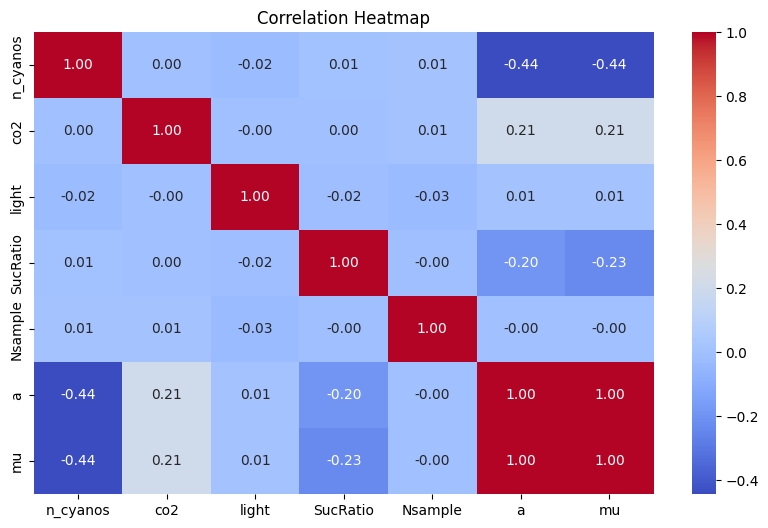

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap illustrates how each variable is related to the others, using a color scale where blue indicates negative correlations and red shows positive ones.

It’s clear that **a** and **mu** are strongly positively correlated, while **n_cyanos** is negatively correlated with both, implying that a higher number of cyanobacteria tends to lower the growth rate and maximum bacterial count. Other factors like **co2**, **light**, and **SucRatio** show only weak relationships with the target variables. This heatmap is useful for understanding key connections and can guide the selection of important features when building a model.

---

<u>Graphs<u>
--

<u>A) Scatterplots Showing the Relationship Between Features and Target 'a'.<u>
--

The scatterplot shows the relationship between the features (n_cyanos, co2, light, SucRatio) and the target variable a (Max Bacteria Count). It highlights the concentration of data in lower feature value ranges and varying correlation levels.

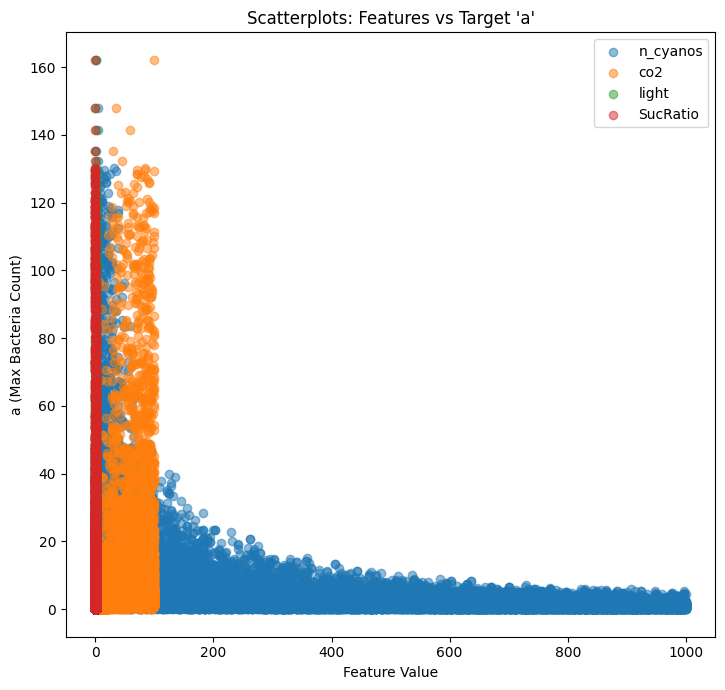

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)
for feature in ['n_cyanos', 'co2', 'light', 'SucRatio']:
    plt.scatter(data[feature], data['a'], alpha=0.5, label=feature)
plt.title("Scatterplots: Features vs Target 'a'")
plt.xlabel("Feature Value")
plt.ylabel("a (Max Bacteria Count)")
plt.legend()
plt.tight_layout()
plt.show()

---
<u>B) Scatterplots Showing the Relationship Between Features and Target 'mu'.<u>
--

The scatterplot shows the relationship between the features (n_cyanos, co2, light, SucRatio) and the target variable mu. It highlights the concentration of data in lower feature value ranges and varying correlation levels.

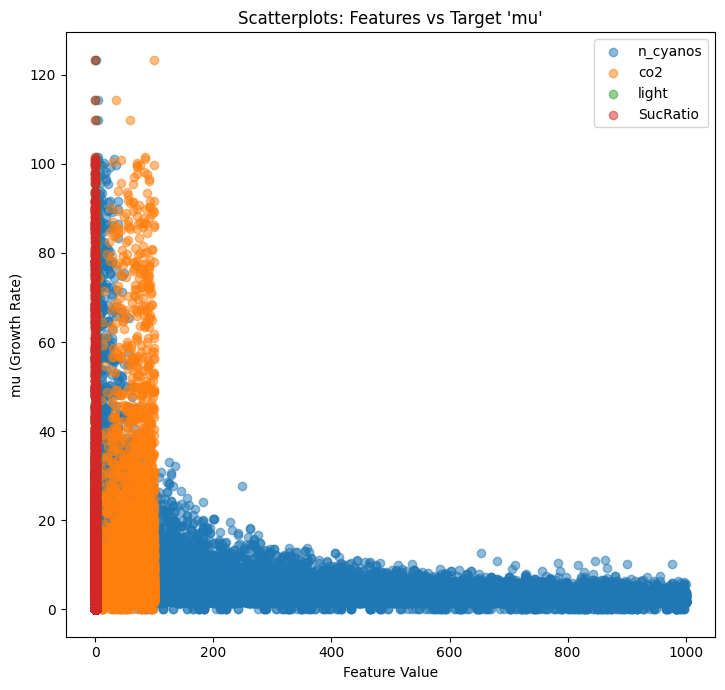

In [6]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)
for feature in ['n_cyanos', 'co2', 'light', 'SucRatio']:
    plt.scatter(data[feature], data['mu'], alpha=0.5, label=feature)
plt.title("Scatterplots: Features vs Target 'mu'")
plt.xlabel("Feature Value")
plt.ylabel("mu (Growth Rate)")
plt.legend()
plt.tight_layout()
plt.show()

---

<u>Data Normalization<u>
--

The below code normalizes the selected features using the `MinMaxScaler` from `sklearn.preprocessing`. It starts by importing the scaler and then chooses the features to normalize: *n_cyanos*, *co2*, *light*, *SucRatio*, and *Nsample*. The scaler is then applied to adjust these features so that their values fall within the range of 0 to 1.

In [7]:
from sklearn.preprocessing import MinMaxScaler
features = ['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data.describe()

,n_cyanos,co2,light,SucRatio,Nsample,a,mu
count,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000,19992.000000
mean,0.493354,0.498900,0.495162,0.496075,0.499969,5.490172,5.634110
std,0.289537,0.291386,0.289768,0.289731,0.288690,13.441047,9.862259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000539
25%,0.240481,0.244147,0.234114,0.240803,0.249962,0.703064,1.852808
50%,0.497996,0.498328,0.494983,0.494983,0.499975,1.775632,3.037436
75%,0.739479,0.752508,0.742475,0.742475,0.749937,4.210368,5.038206
max,1.000000,1.000000,1.000000,1.000000,1.000000,162.186465,123.376876


Data Normalization Results:
The selected features (n_cyanos, co2, light, SucRatio, Nsample) are **normalized to a scale of 0 to 1**. The target variables (a and mu) remain unchanged as they are not features.

---
<u>Data Splitting <u>
--

The below code splits the dataset into training (70%), validation (15%), and test (15%) sets using train_test_split. It selects features and target variables, ensuring reproducibility with `random_state=42`. The sizes of each dataset are then displayed to show the data distribution.

In [8]:
from sklearn.model_selection import train_test_split
X = data[['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample']]
y_a = data['a']
y_mu = data['mu']
X_train, X_temp, y_a_train, y_a_temp, y_mu_train, y_mu_temp = train_test_split(
    X, y_a, y_mu, test_size=0.3, random_state=42
)
X_validate, X_test, y_a_validate, y_a_test, y_mu_validate, y_mu_test = train_test_split(
    X_temp, y_a_temp, y_mu_temp, test_size=0.5, random_state=42
)
{
    "Training Size": len(X_train),
    "Validation Size": len(X_validate),
    "Test Size": len(X_test)
}

{'Training Size': 13994, 'Validation Size': 2999, 'Test Size': 2999}

The data has been successfully split into **13,994 samples for the training set**, **2,999 samples for the validation set**, and **2,999 samples for the test set**.

---
<u>Linear Regression Pipeline for Predicting 'a' without using 'mu'<u>
--

The code trains a Linear Regression model on the training data, makes predictions on the validation set, and evaluates performance using *Mean Squared Error (MSE) and R² score*. 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_a_train)
y_a_validate_pred_lr = lr_model.predict(X_validate)
lr_mse = mean_squared_error(y_a_validate, y_a_validate_pred_lr)
lr_r2 = r2_score(y_a_validate, y_a_validate_pred_lr)
{
    "Linear Regression MSE": lr_mse,
    "Linear Regression R2 Score": lr_r2
}

{'Linear Regression MSE': np.float64(129.30390338971657),
 'Linear Regression R2 Score': 0.28268551052964497}

The Linear Regression pipeline has been evaluated with a **Mean Squared Error (MSE) of 129.30 and an R² Score of 0.28**.

---

<u>RandomForestRegressor Pipeline for Predicting 'a' without using 'mu'<u>
--

The below code initializes a Random Forest Regressor model and trains it using the training data. It then makes predictions on the validation set and evaluates the model's performance using *Mean Squared Error (MSE) and R² score*.

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_a_train)
y_a_validate_pred_rf = rf_model.predict(X_validate)
rf_mse = mean_squared_error(y_a_validate, y_a_validate_pred_rf)
rf_r2 = r2_score(y_a_validate, y_a_validate_pred_rf)
{
    "Random Forest MSE": rf_mse,
    "Random Forest R2 Score": rf_r2
}

{'Random Forest MSE': np.float64(6.871545985083747),
 'Random Forest R2 Score': 0.9618800409659217}

The RandomForestRegressor pipeline has been evaluated with a **Mean Squared Error (MSE) of 6.87 and an R² Score of 0.96**.

---

<u>Comparison of Model Performance<u>
--

The RandomForestRegressor significantly outperforms Linear Regression in both MSE and R² score. It captures more complex relationships within the data, resulting in better predictions for the target variable *a*.

---

<u>Linear Regression Pipeline for Predicting 'mu'<u>
--

The below code trains a Linear Regression model to predict the target variable *mu* using the training data. It then predicts the values for the validation set and measures the model's performance by calculating the *Mean Squared Error (MSE) and R² score*.

In [11]:
lr_model_mu = LinearRegression()
lr_model_mu.fit(X_train, y_mu_train)
y_mu_validate_pred_lr = lr_model_mu.predict(X_validate)
lr_mu_mse = mean_squared_error(y_mu_validate, y_mu_validate_pred_lr)
lr_mu_r2 = r2_score(y_mu_validate, y_mu_validate_pred_lr)
{
    "Linear Regression MSE (mu)": lr_mu_mse,
    "Linear Regression R2 Score (mu)": lr_mu_r2
}

{'Linear Regression MSE (mu)': np.float64(67.42528306175794),
 'Linear Regression R2 Score (mu)': 0.30078964336365044}

The Linear Regression model for predicting *mu* has been evaluated, showing a **Mean Squared Error (MSE) of 67.43 and an R² score of 0.30**.

---

<u>RandomForestRegressor Pipeline for Predicting 'mu'<u>
--

The below code trains a Random Forest Regressor model to predict the target variable *mu* using the training data. It then makes predictions on the validation set and evaluates the model's performance by calculating the *Mean Squared Error (MSE) and R² score*.

In [12]:
rf_model_mu = RandomForestRegressor(random_state=42)
rf_model_mu.fit(X_train, y_mu_train)
y_mu_validate_pred_rf = rf_model_mu.predict(X_validate)
rf_mu_mse = mean_squared_error(y_mu_validate, y_mu_validate_pred_rf)
rf_mu_r2 = r2_score(y_mu_validate, y_mu_validate_pred_rf)
{
    "Random Forest MSE (mu)": rf_mu_mse,
    "Random Forest R2 Score (mu)": rf_mu_r2
}

{'Random Forest MSE (mu)': np.float64(3.7525861502493854),
 'Random Forest R2 Score (mu)': 0.9610851155341655}

The RandomForestRegressor model for predicting *mu* has been evaluated, showing a **Mean Squared Error (MSE) of 3.75 and an R² score of 0.96**.

---
<u>Summary of Results<u>
--
**The predictions for *a* and *mu* show that the RandomForestRegressor performs much better than Linear Regression**. For *a*, the RandomForestRegressor has a much lower Mean Squared Error (MSE) of 6.87 and a higher R² score of 0.96, compared to Linear Regression's MSE of 129.30 and R² of 0.28. Similarly, for *mu*, the RandomForestRegressor has an MSE of 3.75 and an R² of 0.96, while Linear Regression's MSE is 67.43 and R² is 0.30. This shows that RandomForestRegressor is better at capturing the complex relationships in the data.

---

<u>Hyperparameters for Predicting 'a' Using RandomForestRegressor'<u>
---

The code performs a refined grid search for the RandomForestRegressor by testing a smaller set of hyperparameters, including *n_estimators, max_depth, and min_samples_split*, using 2-fold cross-validation. It fits the model on the training data for predicting a and outputs the best hyperparameters and the best Mean Squared Error (MSE) score.

In [13]:
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=1
)
rf_grid_search.fit(X_train, y_a_train)
rf_best_params = rf_grid_search.best_params_
rf_best_score = -rf_grid_search.best_score_
{
    "Best Parameters (RandomForest - a)": rf_best_params,
    "Best MSE (RandomForest - a)": rf_best_score
}

Fitting 2 folds for each of 8 candidates, totalling 16 fits


{'Best Parameters (RandomForest - a)': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 100},
 'Best MSE (RandomForest - a)': np.float64(5.387648181458792)}

The grid search for optimizing the RandomForestRegressor to predict *a* found the best parameters to be **n_estimators: 100**, **max_depth: None**, and **min_samples_split: 2**, with the best Mean Squared Error (MSE) of 5.39.

---

<u>Hyperparameters for Predicting 'mu' Using RandomForestRegressor<u>
---

The below code performs a grid search on the RandomForestRegressor for predicting *mu*, using a set of hyperparameters and 2-fold cross-validation. It fits the model on the training data, and then outputs the best parameters and Mean Squared Error (MSE) score for *mu*.

In [14]:
rf_grid_search_mu = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=1
)
rf_grid_search_mu.fit(X_train, y_mu_train)
rf_best_params_mu = rf_grid_search_mu.best_params_
rf_best_score_mu = -rf_grid_search_mu.best_score_
{
    "Best Parameters (RandomForest - mu)": rf_best_params_mu,
    "Best MSE (RandomForest - mu)": rf_best_score_mu
}

Fitting 2 folds for each of 8 candidates, totalling 16 fits


{'Best Parameters (RandomForest - mu)': {'max_depth': 20,
  'min_samples_split': 2,
  'n_estimators': 100},
 'Best MSE (RandomForest - mu)': np.float64(3.2348898759603717)}

The grid search for RandomForestRegressor found the best parameters for predicting *mu* to be **n_estimators**: 100, **max_depth**: 20, and **min_samples_split**: 2, with a best Mean Squared Error (MSE) of 3.23.

---

<u>Fine-tuning and Evaluating Linear Regression Models for Predicting a and mu Using Cross-Validation<u>
---

The code initializes a Linear Regression model and evaluates its performance for predicting both *a* and *mu* using 3-fold cross-validation. It calculates the Mean Squared Error (MSE) for each target by averaging the negative MSE scores from cross-validation and outputs the best MSE values for *a* and *mu*.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
lr_model = LinearRegression()
lr_cv_scores_a = cross_val_score(lr_model, X_train, y_a_train, scoring='neg_mean_squared_error', cv=3)
lr_best_mse_a = -np.mean(lr_cv_scores_a)
lr_cv_scores_mu = cross_val_score(lr_model, X_train, y_mu_train, scoring='neg_mean_squared_error', cv=3)
lr_best_mse_mu = -np.mean(lr_cv_scores_mu)
{
    "Best MSE (Linear Regression - a)": lr_best_mse_a,
    "Best MSE (Linear Regression - mu)": lr_best_mse_mu
}

{'Best MSE (Linear Regression - a)': np.float64(131.082769579269),
 'Best MSE (Linear Regression - mu)': np.float64(69.42642287559552)}

The results of the Linear Regression models after cross-validation show a **Best MSE of 131.08** for predicting **a** and **69.43** for predicting **mu**.

---
<u>Evaluating the Final Tuned Models on the Test Dataset<u>
---

The below code trains Linear Regression and optimized RandomForest models on the training data to predict targets *a* and *mu*. It then evaluates both models on the test data, calculating the Mean Squared Error (MSE) and R-squared (R²) scores for each target. The results provide a comparison of the models' performance in terms of accuracy and variance explained for *a* and *mu*.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

lr_model.fit(X_train, y_a_train)
lr_test_mse_a, lr_test_r2_a = mean_squared_error(y_a_test, lr_model.predict(X_test)), r2_score(y_a_test, lr_model.predict(X_test))

lr_model.fit(X_train, y_mu_train)
lr_test_mse_mu, lr_test_r2_mu = mean_squared_error(y_mu_test, lr_model.predict(X_test)), r2_score(y_mu_test, lr_model.predict(X_test))

rf_a = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42).fit(X_train, y_a_train)
rf_test_mse_a, rf_test_r2_a = mean_squared_error(y_a_test, rf_a.predict(X_test)), r2_score(y_a_test, rf_a.predict(X_test))

rf_mu = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42).fit(X_train, y_mu_train)
rf_test_mse_mu, rf_test_r2_mu = mean_squared_error(y_mu_test, rf_mu.predict(X_test)), r2_score(y_mu_test, rf_mu.predict(X_test))
{
    "Linear Regression Test MSE (a)": lr_test_mse_a,
    "Linear Regression Test R2 (a)": lr_test_r2_a,
    "Linear Regression Test MSE (mu)": lr_test_mse_mu,
    "Linear Regression Test R2 (mu)": lr_test_r2_mu,
    "Random Forest Test MSE (a)": rf_test_mse_a,
    "Random Forest Test R2 (a)": rf_test_r2_a,
    "Random Forest Test MSE (mu)": rf_test_mse_mu,
    "Random Forest Test R2 (mu)": rf_test_r2_mu
}


{'Linear Regression Test MSE (a)': np.float64(128.26580744879368),
 'Linear Regression Test R2 (a)': 0.28119534403914404,
 'Linear Regression Test MSE (mu)': np.float64(67.75331631740265),
 'Linear Regression Test R2 (mu)': 0.29337741269688433,
 'Random Forest Test MSE (a)': np.float64(4.57817712577137),
 'Random Forest Test R2 (a)': 0.9743437857736816,
 'Random Forest Test MSE (mu)': np.float64(2.610253428295482),
 'Random Forest Test R2 (mu)': 0.9727767712154745}

---
<u>Final Evaluation Results<u>
--

<u>Predictions for a:<u>
--

Linear Regression achieved a Test Mean Squared Error (MSE) of **128.27** and an R² score of **0.28**, indicating limited predictive accuracy. In contrast, RandomForestRegressor performed significantly better, with a Test MSE of **4.58** and an R² score of **0.97**, demonstrating exceptional accuracy and a strong fit to the data.

<u>Predictions for mu:<u>
--

Linear Regression yielded a Test MSE of **67.75** and an R² score of **0.29**, showing suboptimal performance. On the other hand, RandomForestRegressor again excelled, achieving a Test MSE of **2.61** and an R² score of **0.97**, confirming its ability to model the data effectively.

---

<u>Observations<u>
--

The results underscore the superiority of RandomForestRegressor over Linear Regression for both *a* and *mu*. RandomForest's capability to capture intricate patterns in the data establishes it as the ideal choice for this dataset, as demonstrated by its substantially lower error rates and enhanced predictive performance.

---

<u>Visualizing Predictions vs Actual Values for 'a' using RandomForestRegressor<u>
---

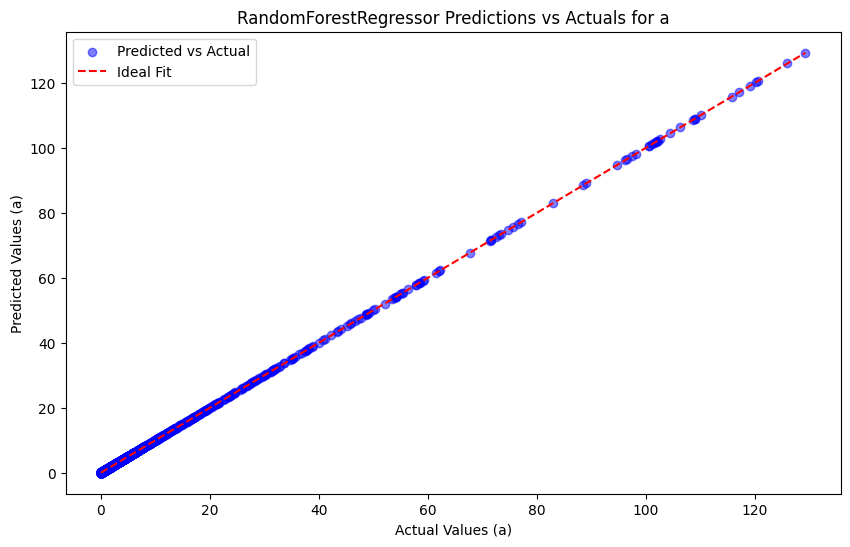

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_a_test, y_a_test, alpha=0.5, label='Predicted vs Actual', color='blue')
plt.plot([y_a_test.min(), y_a_test.max()], [y_a_test.min(), y_a_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Values (a)')
plt.ylabel('Predicted Values (a)')
plt.title('RandomForestRegressor Predictions vs Actuals for a')
plt.legend()
plt.show()

The points closely align with the red dashed line, indicating excellent predictive performance.

---
<u>Visualizing Predictions vs Actual Values for 'mu' using RandomForestRegressor<u>
--

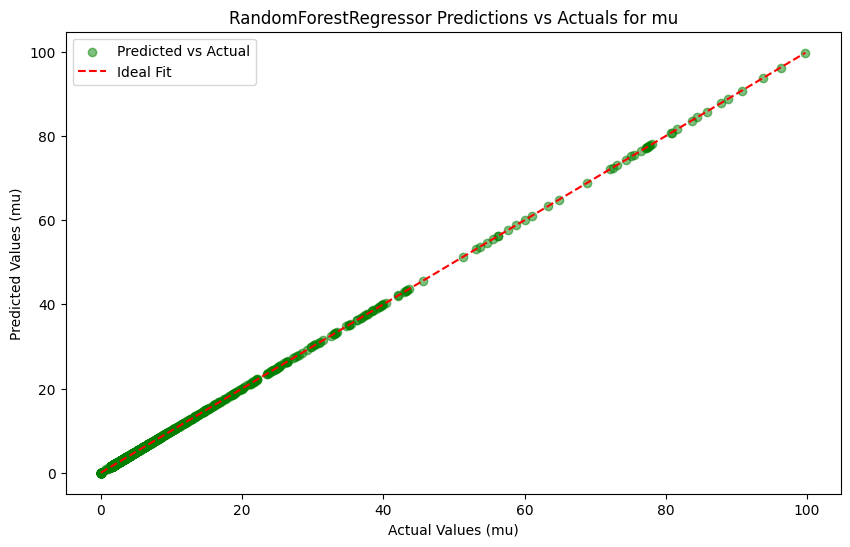

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_mu_test, y_mu_test, alpha=0.5, label='Predicted vs Actual', color='green')
plt.plot([y_mu_test.min(), y_mu_test.max()], [y_mu_test.min(), y_mu_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Values (mu)')
plt.ylabel('Predicted Values (mu)')
plt.title('RandomForestRegressor Predictions vs Actuals for mu')
plt.legend()
plt.show()

Similarly, the points cluster around the ideal fit line, demonstrating strong predictive accuracy.

---
---